In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
df= pd.read_csv("Netflix_titles.csv", engine="python")

In [44]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [46]:
df.shape

(6234, 12)

In [47]:
df.describe()

,show_id,release_year
count,6.234000e+03,6234.00000
mean,7.670368e+07,2013.35932
std,1.094296e+07,8.81162
min,2.477470e+05,1925.00000
25%,8.003580e+07,2013.00000
50%,8.016337e+07,2016.00000
75%,8.024489e+07,2018.00000
max,8.123573e+07,2020.00000


### Dealing with Missing values

In [48]:
percentage= df.isnull().sum()*100/len(df)
print(round(percentage, 2))

show_id          0.00
type             0.00
title            0.00
director        31.58
cast             9.14
country          7.64
date_added       0.18
release_year     0.00
rating           0.16
duration         0.00
listed_in        0.00
description      0.00
dtype: float64


In [49]:
df['country'] = df['country'].replace(np.nan, "NA")

In [50]:
df.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country            0
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

In [51]:
percentage= df.isnull().sum()*100/len(df)
print(round(percentage, 2))

show_id          0.00
type             0.00
title            0.00
director        31.58
cast             9.14
country          0.00
date_added       0.18
release_year     0.00
rating           0.16
duration         0.00
listed_in        0.00
description      0.00
dtype: float64


In [71]:
df.director.fillna('Unknown', inplace= True)
df.cast.fillna('Unknown', inplace= True)
df.rating.fillna('Unknown', inplace= True)

In [72]:
df.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      11
release_year     0
rating           0
duration         0
listed_in        0
description      0
year            11
dtype: int64

In [75]:
df.dropna(inplace= True)

In [76]:
df.shape

(6223, 13)

In [52]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

### Understanding the data

1.   Types of Shows



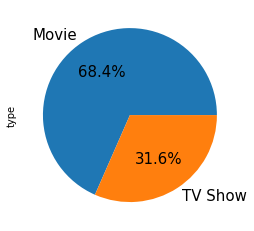

In [53]:
df['type'].value_counts().plot(kind='pie', autopct= '%1.1f%%', fontsize= 15)



2.   Director



In [54]:
df['director'].nunique()

3301

Text(0.5, 1.0, 'Top 10 directors')

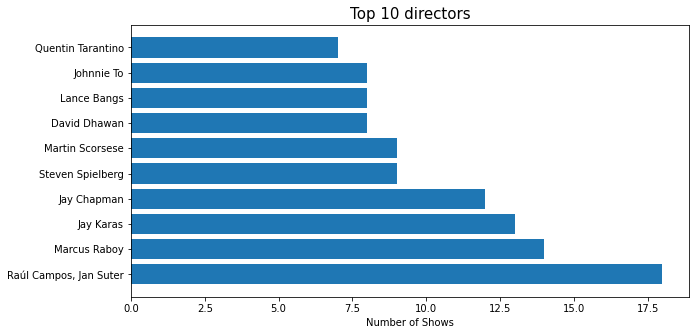

In [55]:
top10_directors= df['director'].value_counts().nlargest(10)
fig= plt.figure(figsize=(10,5))
plt.barh(top10_directors.index, top10_directors.values)
plt.xlabel("Number of Shows")
plt.title("Top 10 directors", fontsize= 15)



3.   Date and Year



In [56]:
df['date_added']= pd.to_datetime(df['date_added'])

In [57]:
df['year']= df['date_added'].dt.year

In [78]:
df['month']= df['date_added'].dt.month

In [58]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,2019.0
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,2016.0


In [59]:
diff= df['year']- df['release_year']

In [60]:
diff.head()

0    0.0
1    0.0
2    5.0
3    2.0
4    0.0
dtype: float64

In [61]:
df['year']= df['year'].fillna(0)
df['year']= df['year'].astype(int)

In [62]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,2019
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,2016
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",2018
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,2018
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017


In [63]:
df.describe()

,show_id,release_year,year
count,6.234000e+03,6234.00000,6234.000000
mean,7.670368e+07,2013.35932,2014.422522
std,1.094296e+07,8.81162,84.708249
min,2.477470e+05,1925.00000,0.000000
25%,8.003580e+07,2013.00000,2017.000000
50%,8.016337e+07,2016.00000,2018.000000
75%,8.024489e+07,2018.00000,2019.000000
max,8.123573e+07,2020.00000,2020.000000


In [64]:
df['year']= df['year'].replace(0, np.nan)

In [65]:
grouped= df.groupby(['year'])['show_id'].count()
grouped2= df.groupby(['release_year'])['show_id'].count()

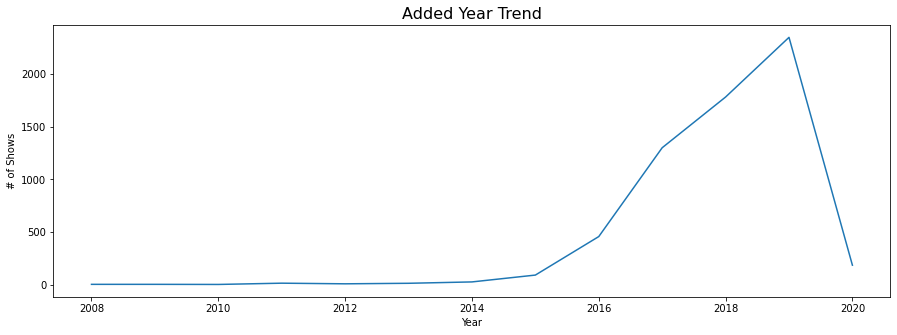

In [66]:
fig = plt.figure(figsize = (15,5))
plt.plot(grouped.index,grouped.values)
plt.title('Added Year Trend', fontsize=16)
plt.xlabel('Year')
plt.ylabel('# of Shows')
plt.show()

In [79]:
df_grouped= df.groupby(['month'])['show_id'].count()

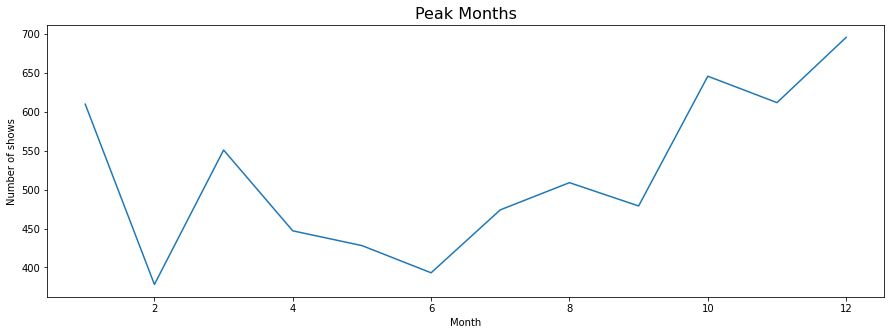

In [82]:
fig= plt.figure(figsize= (15,5))
plt.plot(df_grouped.index, df_grouped.values)
plt.title('Peak Months', fontsize= 16)
plt.xlabel('Month')
plt.ylabel('Number of shows')
plt.show()

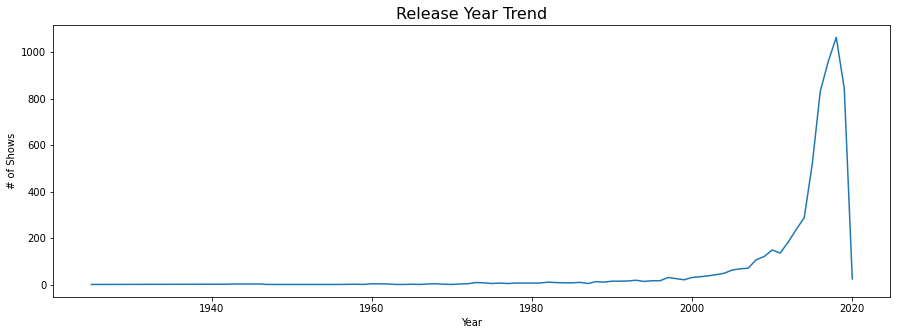

In [67]:
fig = plt.figure(figsize = (15,5))
plt.plot(grouped2.index, grouped2.values)
plt.title('Release Year Trend', fontsize=16)
plt.xlabel('Year')
plt.ylabel('# of Shows')
plt.show()

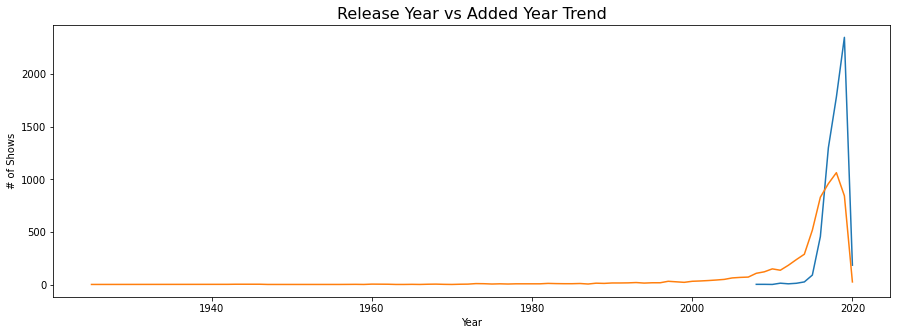

In [68]:
fig = plt.figure(figsize = (15,5))
plt.plot(grouped.index,grouped.values)
plt.plot(grouped2.index, grouped2.values)
plt.title('Release Year vs Added Year Trend', fontsize=16)
plt.xlabel('Year')
plt.ylabel('# of Shows')
plt.show()

In [69]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'year'],
      dtype='object')



4.   Rating



In [70]:
df['rating'].unique()

array(['TV-PG', 'TV-MA', 'TV-Y7-FV', 'TV-Y7', 'TV-14', 'R', 'TV-Y', 'NR',
       'PG-13', 'TV-G', 'PG', 'G', nan, 'UR', 'NC-17'], dtype=object)

Text(0, 0.5, 'Number of shows')

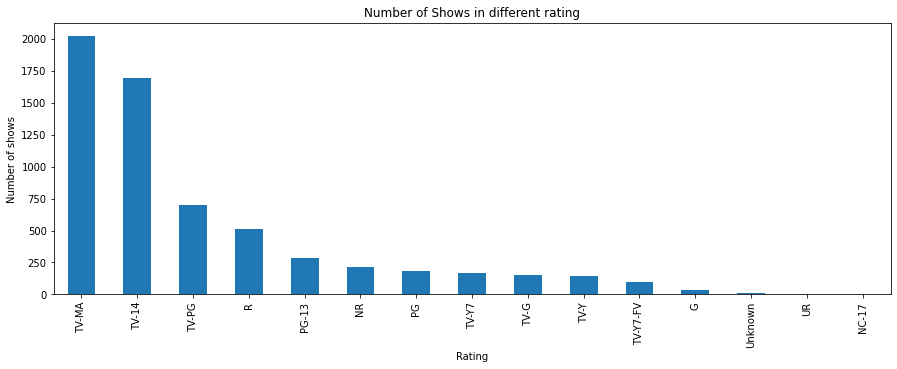

In [87]:
fig= plt.figure(figsize= (15,5))
s= df.rating.value_counts().plot(kind= 'bar')
plt.title('Number of Shows in different rating')
plt.xlabel('Rating')
plt.ylabel('Number of shows')